In [1]:
import pandas as pd

In [2]:
# # grep of 'paraquat' in aledb/md/pub describes the ROS_eAMP experiment as being the only one involving 'paraquat'.
# # grep of 'FeSO4' in aledb/md/pub describes the Iron-ALE experiment as being the only one involving 'FeSO4'.
# all_aledb_MG1655_no_hyp_muts_df = pd.read_pickle('./all_aledb_MG1655_no_hyp_muts_df.pkl')
# all_aledb_MG1655_no_hyp_muts_df.drop_duplicates(inplace=True)  # For some reason, there are duplicates in the data.
# all_aledb_MG1655_no_hyp_muts_df = all_aledb_MG1655_no_hyp_muts_df[all_aledb_MG1655_no_hyp_muts_df.isolate!=0]# Don't use population samples since they don't guarantee that the mutations are co-occurring in the same strain.
# display(len(all_aledb_MG1655_no_hyp_muts_df), all_aledb_MG1655_no_hyp_muts_df.head())

In [3]:
# mut_df = all_aledb_MG1655_no_hyp_muts_df[all_aledb_MG1655_no_hyp_muts_df.exp.isin(['ROS_eAMP', 'Iron-ALE'])]

mut_df = pd.read_pickle('./paraquat_FeSO4_ale_exp_all_muts_no_hyp_df.pkl')
mut_df.drop_duplicates(inplace=True)  # For some reason, there are duplicates in the data.
mut_df = mut_df[mut_df.isolate!=0]  # Don't use population samples since they don't guarantee that the mutations are co-occurring in the same strain.

display(len(mut_df), mut_df.exp.unique(), mut_df.head())

640

array(['Iron-ALE', 'ROS_eAMP'], dtype=object)

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,sample,coding,exp ALE
52436,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,17 45 1 1,True,Iron-ALE 17
52437,Iron-ALE,18,39,1,1,1.0,2067837,SNP,G→T,pseudogene (56/435 nt),yoeG,NC_000913,public,18 39 1 1,False,Iron-ALE 18
52438,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,18 39 1 1,True,Iron-ALE 18
52439,Iron-ALE,18,39,1,1,1.0,3815859,DEL,Δ82 bp,,rph,NC_000913,public,18 39 1 1,True,Iron-ALE 18
52440,Iron-ALE,19,39,1,1,1.0,331806,SNP,G→A,intergenic (+310/‑565),"betT, yahA",NC_000913,public,19 39 1 1,False,Iron-ALE 19


In [4]:
regdb_gene_df = pd.read_csv(
    "./data/regulondb10/gene.txt", sep="\t", comment='#', header=None)
regdb_gene_df.columns = [
    "GENE_ID",
    "GENE_NAME",
    "GENE_POSLEFT",
    "GENE_POSRIGHT",
    "GENE_STRAND",
    "GENE_SEQUENCE",
    "GC_CONTENT",
    "CRI_SCORE",
    "GENE_NOTE",
    "GENE_INTERNAL_COMMENT",
    "KEY_ID_ORG",
    "GENE_TYPE"
]


gene_synonym_df = pd.read_csv(
    "./data/regulondb10/object_synonym.txt",
    sep="\t",
    comment='#',
    header=None,
    quoting=3
)
gene_synonym_df.columns = ["OBJECT_ID", "OBJECT_SYNONYM_NAME", "OS_INTERNAL_COMMENT", "KEY_ID_ORG"]
gene_synonym_df.head()


def _get_gene_bnum(gene_name):
    gene_bnum = ""
    gene_df = regdb_gene_df[regdb_gene_df["GENE_NAME"]==gene_name]
    if len(gene_df) > 0:
        regdb_id = gene_df.iloc[0]["GENE_ID"]
        g_synonym_df = gene_synonym_df[gene_synonym_df["OBJECT_ID"]==regdb_id]
        g_bnum_df = g_synonym_df[g_synonym_df["OBJECT_SYNONYM_NAME"].str.contains('^b\d{4}')]
        if len(g_bnum_df) > 0:
            gene_bnum = g_bnum_df.iloc[0]["OBJECT_SYNONYM_NAME"]
    return gene_bnum

assert(_get_gene_bnum("rpoB")=="b3987")

In [5]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aledbmutil.mut import get_clean_mut_gene_list, is_genetic_mut


mut_df["genetic"] = mut_df["Details"].apply(is_genetic_mut)
mut_df["clean genes"] = mut_df.apply(
    lambda m: set(get_clean_mut_gene_list(m["Gene"]) if m["genetic"] else set()),  # For when using gene names instead of bnums
    axis=1)
mut_df.head()

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,sample,coding,exp ALE,genetic,clean genes
52436,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,17 45 1 1,True,Iron-ALE 17,True,{oxyR}
52437,Iron-ALE,18,39,1,1,1.0,2067837,SNP,G→T,pseudogene (56/435 nt),yoeG,NC_000913,public,18 39 1 1,False,Iron-ALE 18,True,{yoeG}
52438,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,18 39 1 1,True,Iron-ALE 18,True,{oxyR}
52439,Iron-ALE,18,39,1,1,1.0,3815859,DEL,Δ82 bp,,rph,NC_000913,public,18 39 1 1,True,Iron-ALE 18,True,{rph}
52440,Iron-ALE,19,39,1,1,1.0,331806,SNP,G→A,intergenic (+310/‑565),"betT, yahA",NC_000913,public,19 39 1 1,False,Iron-ALE 19,False,{}


In [6]:
from tqdm import tqdm
tqdm.pandas()

# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)

# For whatever reason, parallel_apply's progress bars freeze,
# which makes me think that parallel_apply crashes, though not sure.
# tqdm's progress_apply successfully returns progress though.
mut_df["bnums"] = mut_df.progress_apply(
# aledb_MG1655_ep_max_freq_mut_df["bnums"] = aledb_MG1655_ep_max_freq_mut_df.parallel_apply(
    lambda m: {_get_gene_bnum(gn) for gn in m['clean genes']},
    axis=1)
mut_df.head()

  0%|          | 0/640 [00:00<?, ?it/s]

100%|██████████| 640/640 [00:01<00:00, 586.70it/s]


,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,sample,coding,exp ALE,genetic,clean genes,bnums
52436,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,17 45 1 1,True,Iron-ALE 17,True,{oxyR},{b3961}
52437,Iron-ALE,18,39,1,1,1.0,2067837,SNP,G→T,pseudogene (56/435 nt),yoeG,NC_000913,public,18 39 1 1,False,Iron-ALE 18,True,{yoeG},{b4640}
52438,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,18 39 1 1,True,Iron-ALE 18,True,{oxyR},{b3961}
52439,Iron-ALE,18,39,1,1,1.0,3815859,DEL,Δ82 bp,,rph,NC_000913,public,18 39 1 1,True,Iron-ALE 18,True,{rph},{b3643}
52440,Iron-ALE,19,39,1,1,1.0,331806,SNP,G→A,intergenic (+310/‑565),"betT, yahA",NC_000913,public,19 39 1 1,False,Iron-ALE 19,False,{},{}


In [7]:
# genes of interest from Kevin's analysis: fur, iscR, ygfZ
genes_of_interest= {'b0683', 'b2531', 'b2898',
'b3961'  # oxyR
}

mut_df["genes of interest"] = mut_df.apply(
    lambda m: m["bnums"] & genes_of_interest,
    axis=1)
aledb_obs_mut_genes_of_interest_df = mut_df[mut_df["genes of interest"]!=set()].copy()
display(len(aledb_obs_mut_genes_of_interest_df), aledb_obs_mut_genes_of_interest_df.head())

98

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,sample,coding,exp ALE,genetic,clean genes,bnums,genes of interest
52436,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,17 45 1 1,True,Iron-ALE 17,True,{oxyR},{b3961},{b3961}
52438,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,18 39 1 1,True,Iron-ALE 18,True,{oxyR},{b3961},{b3961}
52444,Iron-ALE,19,39,1,1,1.0,4158809,SNP,C→T,P107L (CCG→CTG),oxyR,NC_000913,public,19 39 1 1,True,Iron-ALE 19,True,{oxyR},{b3961},{b3961}
52448,Iron-ALE,20,40,1,1,1.0,4158827,SNP,T→A,L113Q (CTG→CAG),oxyR,NC_000913,public,20 40 1 1,True,Iron-ALE 20,True,{oxyR},{b3961},{b3961}
131742,ROS_eAMP,1,112,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public,1 112 1 1,True,ROS_eAMP 1,True,{ygfZ},{b2898},{b2898}


In [8]:
aledb_obs_mut_genes_of_interest_df['sample'] = aledb_obs_mut_genes_of_interest_df['exp'] + '_' + aledb_obs_mut_genes_of_interest_df['sample']
aledb_obs_mut_genes_of_interest_df

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,sample,coding,exp ALE,genetic,clean genes,bnums,genes of interest
52436,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,Iron-ALE_17 45 1 1,True,Iron-ALE 17,True,{oxyR},{b3961},{b3961}
52438,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,Iron-ALE_18 39 1 1,True,Iron-ALE 18,True,{oxyR},{b3961},{b3961}
52444,Iron-ALE,19,39,1,1,1.0,4158809,SNP,C→T,P107L (CCG→CTG),oxyR,NC_000913,public,Iron-ALE_19 39 1 1,True,Iron-ALE 19,True,{oxyR},{b3961},{b3961}
52448,Iron-ALE,20,40,1,1,1.0,4158827,SNP,T→A,L113Q (CTG→CAG),oxyR,NC_000913,public,Iron-ALE_20 40 1 1,True,Iron-ALE 20,True,{oxyR},{b3961},{b3961}
131742,ROS_eAMP,1,112,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public,ROS_eAMP_1 112 1 1,True,ROS_eAMP 1,True,{ygfZ},{b2898},{b2898}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133015,ROS_eAMP,9,31,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public,ROS_eAMP_9 31 1 1,True,ROS_eAMP 9,True,{ygfZ},{b2898},{b2898}
133042,ROS_eAMP,9,59,1,1,1.0,2662023,SNP,T→C,I37V (ATT→GTT),iscR,NC_000913,public,ROS_eAMP_9 59 1 1,True,ROS_eAMP 9,True,{iscR},{b2531},{b2531}
133045,ROS_eAMP,9,59,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public,ROS_eAMP_9 59 1 1,True,ROS_eAMP 9,True,{ygfZ},{b2898},{b2898}
133075,ROS_eAMP,9,77,1,1,1.0,710595,SNP,G→T,P18T (CCT→ACT),fur,NC_000913,public,ROS_eAMP_9 77 1 1,True,ROS_eAMP 9,True,{fur},{b0683},{b0683}


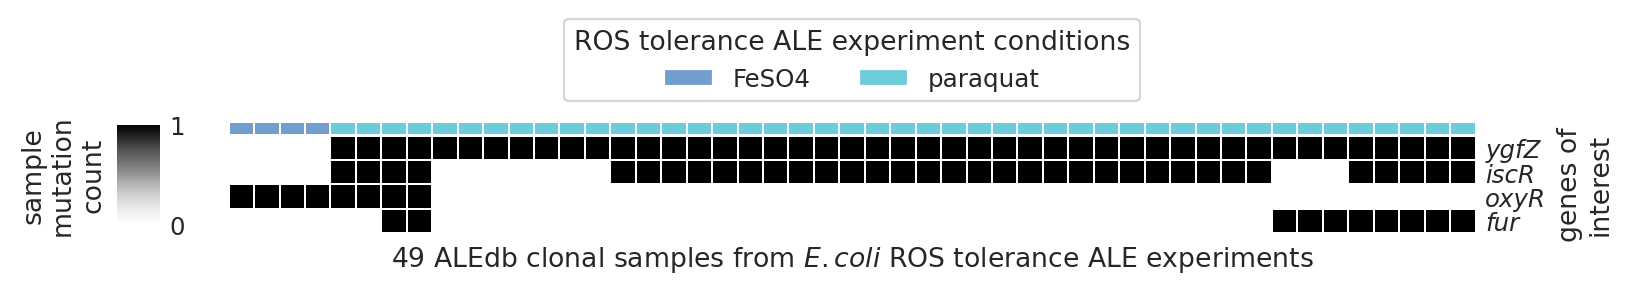

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("white")

smpl_gene_mat = pd.DataFrame(0, index=aledb_obs_mut_genes_of_interest_df['sample'].unique(), columns=aledb_obs_mut_genes_of_interest_df['Gene'].unique())
for i, r in aledb_obs_mut_genes_of_interest_df.iterrows():
    smpl_gene_mat.loc[r['sample'], r['Gene']] += 1

col_colors = ['#729ECE' if 'Iron' in i else '#6DCCDA' for i in smpl_gene_mat.index]

cm = sns.clustermap(smpl_gene_mat.T, cmap='Greys', figsize=(8.5, 1),
                    cbar_kws={'label': 'sample\nmutation\ncount'},
                    yticklabels=True, xticklabels=False, linewidth=0.1,
                    col_colors=col_colors, colors_ratio=0.1
                    )

# Set the colorbar ticks to display min and max values only
min_val, max_val = np.min(smpl_gene_mat.values), np.max(smpl_gene_mat.values)
cm.cax.set_yticks([min_val, max_val])
cm.cax.set_yticklabels([str(min_val), str(max_val)])

# Remove the ticks on the colorbar while keeping the values
cm.cax.tick_params(axis='y', which='major', length=0)

cm.ax_heatmap.tick_params(axis='y', which='both', length=0, rotation=0)
cm.ax_cbar.set_position((0.135, 0.2, 0.025, 0.5))
cm.ax_col_dendrogram.set_visible(False)
cm.ax_row_dendrogram.set_visible(False)
cm.ax_cbar.yaxis.set_label_position('left')
cm.ax_heatmap.set_xlabel(str(len(smpl_gene_mat)) + ' ALEdb clonal samples from $\it{E. coli}$ ROS tolerance ALE experiments')
cm.ax_heatmap.set_ylabel('genes of\ninterest')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=v, label=k) for k, v in {"FeSO4":'#729ECE', "paraquat":'#6DCCDA'}.items()]  # Probably should build this programmatically.
cm.ax_col_colors.legend(handles=legend_elements, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 1.6),
                        title='ROS tolerance ALE experiment conditions')

plt.setp(cm.ax_heatmap.get_yticklabels(), fontstyle='italic')

plt.savefig("f2c.svg")